## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [1]:
your_name = "Yajur Bhardwaj"
your_student_id = "48682764"

In [2]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [3]:
Data_frame = pd.read_csv("DATA/car_sell.csv",index_col=0)

# To print the length of the data before removing the missing data

length_before = len(Data_frame)
print("Number of records before cleaning the data : " , length_before)

#To print number of null values in each column before cleaning

print("Number of null values in each column before cleaning:")
print(Data_frame.isnull().sum())
 
#Removing records where "year" is "missing" or "fuel" is "none"

Cleaned_Data_frame = Data_frame[(Data_frame['year'].notnull()) & (Data_frame['fuel']!= 'none')]


#To display Clean Dataframe and count the null values

length_after = len(Cleaned_Data_frame) 
print("Number of records after cleaning :" , length_after)

#To print number of null values after cleaning in each column 

print('Number of null values after cleaning in each column : ')
print(Cleaned_Data_frame.isnull().sum())

# to display the data before and after removing the unwanted items
Data_frame.head()
Cleaned_Data_frame.head()



Number of records before cleaning the data :  4340
Number of null values in each column before cleaning:
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64
Number of records after cleaning : 3886
Number of null values after cleaning in each column : 
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [4]:
#Q2.1
# We define the columns first

Columns = ['name','seller_type','transmission','owner']

# To print total number of unique name,unique seller_type,unique transmission and unique owner.

for Different_columns in Columns:
    print(f"Absolute_unique '{Different_columns}':",Cleaned_Data_frame[Different_columns].str.lower().nunique())

Absolute_unique 'name': 1386
Absolute_unique 'seller_type': 3
Absolute_unique 'transmission': 2
Absolute_unique 'owner': 5


In [5]:
#Q2.2
#To print the descriptive statistics including the total number, mean, std, min and max regarding all km_driven.

print("The descriptive analysis for the 'km_driven':")
print(Cleaned_Data_frame['km_driven'].describe())

The descriptive analysis for the 'km_driven':
count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64


In [6]:
#Q2.3
# To print the descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type

Seller_Type_Statistics = Cleaned_Data_frame.groupby('seller_type')['selling_price'].count()
print(Seller_Type_Statistics)
Seller_Statistics = Seller_Type_Statistics.describe()
print("The descriptive statistics for the selling_price grouped by different seller_type :")
print(Seller_Statistics)

seller_type
Dealer               889
Individual          2903
Trustmark Dealer      94
Name: selling_price, dtype: int64
The descriptive statistics for the selling_price grouped by different seller_type :
count       3.000000
mean     1295.333333
std      1447.912405
min        94.000000
25%       491.500000
50%       889.000000
75%      1896.000000
max      2903.000000
Name: selling_price, dtype: float64


In [7]:
#2.4
# To print descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type.

Owner_type = Cleaned_Data_frame.groupby('owner')['year'].count()
print(Owner_type)
Owner_Statistics = Owner_type.describe()
print("The decriptive statistics for the number of years that sold by each owner type :")
print(Owner_Statistics)
                    

owner
First Owner             2532
Fourth & Above Owner      67
Second Owner            1000
Test Drive Car            14
Third Owner              273
Name: year, dtype: int64
The decriptive statistics for the number of years that sold by each owner type :
count       5.000000
mean      777.200000
std      1057.123314
min        14.000000
25%        67.000000
50%       273.000000
75%      1000.000000
max      2532.000000
Name: year, dtype: float64


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

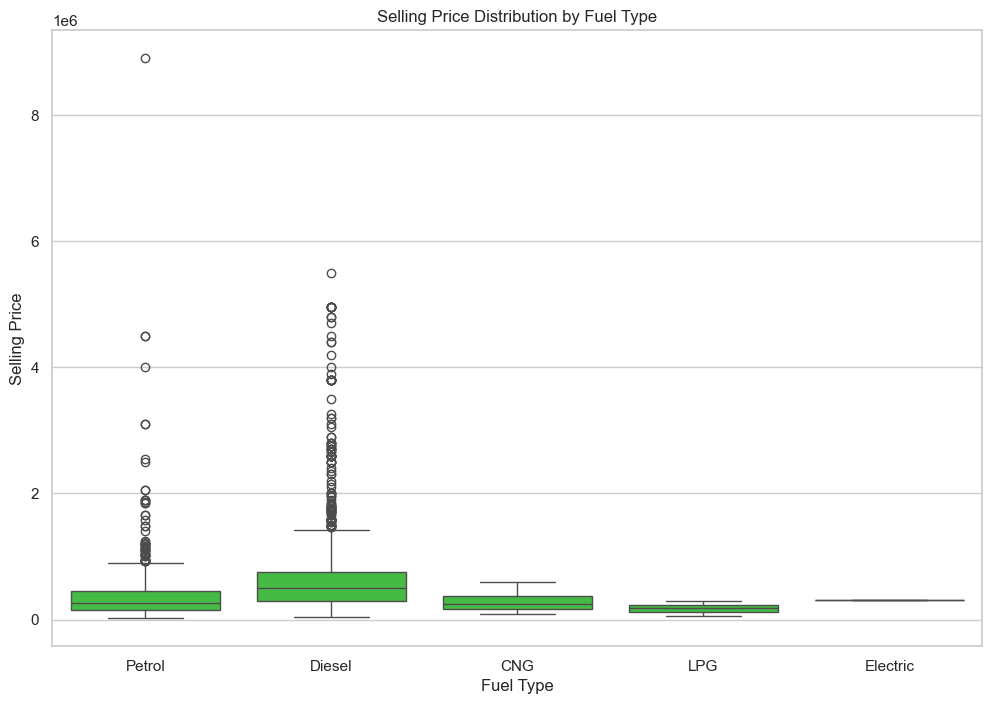

In [8]:
import seaborn as sns
#importing seaborn 

sns.set(style="whitegrid")

#specifying the colour of boxplot

boxplot_color = '#32CD32'#lime green

#specifying the size of the figure(box plot)

plt.figure(figsize=(12,8))

sns.boxplot(x ='fuel',y ='selling_price',data=Cleaned_Data_frame,color=boxplot_color)

#specifying the title of the boxplot

plt.title('Selling Price Distribution by Fuel Type')

#labelling both the axis

plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

# Analysis of Selling Price Distribution by Fuel Type

- **Median Selling Prices:**
  - The median selling price for petrol vehicles is the highest.
  - Diesel vehicles have the second highest median selling price.
  - CNG vehicles have a lower median selling price than diesel.
  - Electric vehicles have the lowest median sales price.

- **Interquartile Range (IQR):**
  - Diesel vehicles have the widest IQR, indicating a larger spread in selling prices compared to other fuel types.
  - LPG and electric vehicles have narrower IQRs, indicating more consistent pricing.

- **Outliers:**
  - Petrol vehicles have the most outliers, suggesting a few unusually high or low selling costs.
  - Electric vehicles have the fewest outliers.



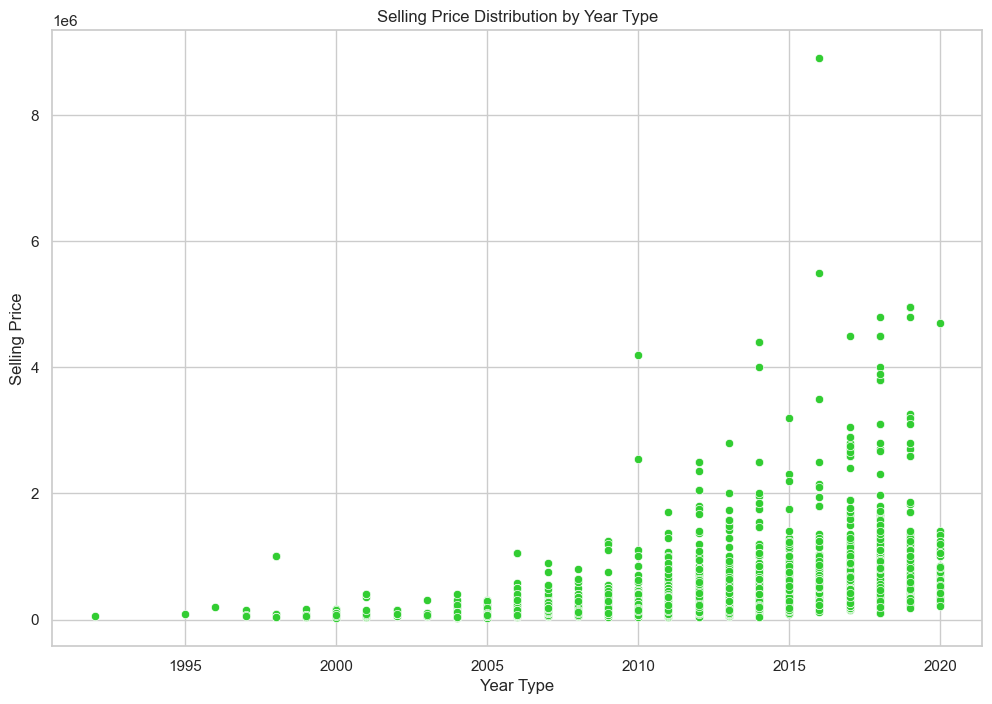

In [9]:
sns.set(style='whitegrid')

#specifying the colour of scatterplot

scatterplot_color = '#32CD32'#lime green

#specifying the size of the figure(scatter plot)

plt.figure(figsize=(12,8))

sns.scatterplot(x='year',y='selling_price',data=Cleaned_Data_frame,color=scatterplot_color)

#specifying the title of the scatter plot

plt.title('Selling Price Distribution by Year Type')

#labelling both the axis

plt.xlabel('Year Type')
plt.ylabel('Selling Price')
plt.show()


# Analysis of Selling Price distribution by YearType

## 1. Strong Positive Correlation

There appears to be a strong positive correlation between year type and selling price. This suggests that as the year type (i.e., newer vehicles) increases, so does the selling price.

## 2. Notable Price Increase

A particularly noticeable increase in selling prices is observed between 2015 and 2020. This may be attributed to factors such as technological advancements, market demand, or economic conditions which contributed to this significant price increase.

## 3. Outliers

A few outliers are visible, particularly in the later years. These outliers indicate that some vehicles were sold at unusually high prices. Possible reasons include limited availability, unique features, or high-demand models.

## 4. Clustering

There seems to be some clustering of data points in specific year types like between 2015 and 2020. This suggests that vehicles from these years might have had similar pricing patterns, potentially due to shared features, market trends, or economic conditions.


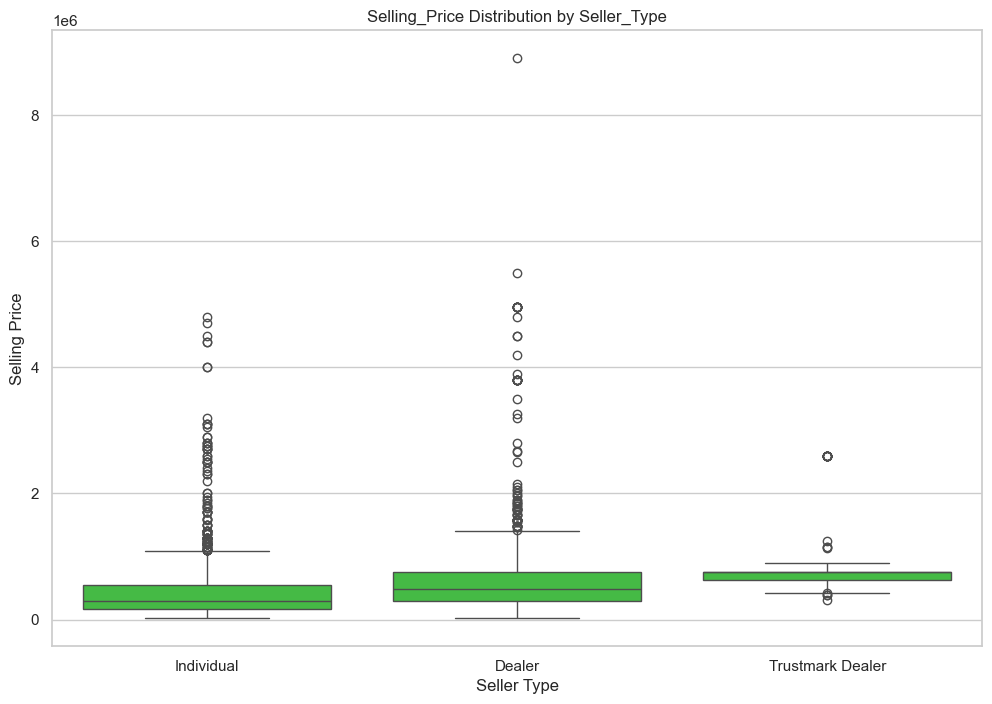

In [10]:
sns.set(style='whitegrid')

#specifying the colour of boxplot

boxplot_color = '#32CD32'#lime green

#specifying the size of the figure(box plot)

plt.figure(figsize=(12,8))

sns.boxplot(x='seller_type',y='selling_price', data= Cleaned_Data_frame,color= boxplot_color)

#specifying the title of the boxplot

plt.title('Selling_Price Distribution by Seller_Type')

#labelling both the axis

plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

# Analysis of Selling Price by Seller Type

## 1. Median Selling Prices

- **Individual Sellers**: Command the highest median selling price.
- **Dealer**: Followed by Dealer sellers.
- **Trustmark Dealer**: Next in median selling price.

## 2. Interquartile Range (IQR)

- **Individual Sellers**: Have the widest IQR, indicating a greater spread in selling prices compared to other seller types.
- **Trustmark Dealer**: Have the narrowest IQR, indicating more consistent pricing.
  
## 3. Outliers

- **Dealer Sellers**: Have the most outliers, suggesting a presence of unusually high or low selling prices.
- **Trustmark Dealer Sellers**: Have the fewest outliers, indicating more uniform pricing.


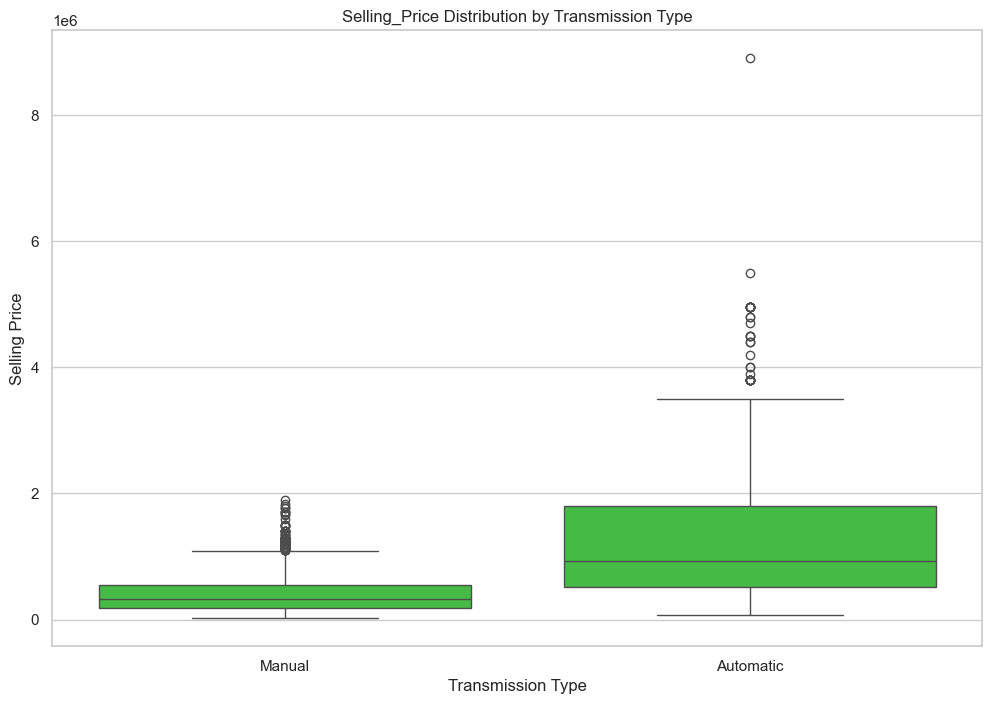

In [11]:
sns.set(style="whitegrid")

#specifying the colour of boxplot

boxplot_color = '#32CD32'#lime green

#specifying the size of the figure(box plot)

plt.figure(figsize=(12,8))
sns.boxplot(x='transmission',y= 'selling_price',data=Cleaned_Data_frame,color=boxplot_color)

#specifying the title of the boxplot

plt.title('Selling_Price Distribution by Transmission Type')

#labelling both the axis

plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()


# Analysis of Selling Price by Transmission Type

## 1. Median Selling Price

- **Automatic Transmissions**: Vehicles with automatic transmissions have a substantially higher median selling price compared to vehicles with manual transmissions.

## 2. Interquartile Range (IQR)

- **Manual Transmissions**: Vehicles with manual transmissions have a wider IQR compared to those with automatic transmissions. This indicates a larger spread in selling prices, suggesting that the price of cars with manual transmissions is more influenced by factors other than the type of transmission, such as mileage, condition, and model year.

## 3. Outliers

- **Automatic Transmissions**: The proportion of outliers among vehicles with automatic transmissions is higher. This suggests there are more models with unusually high or low selling prices, potentially due to exclusive features, restricted supply, or special qualities.


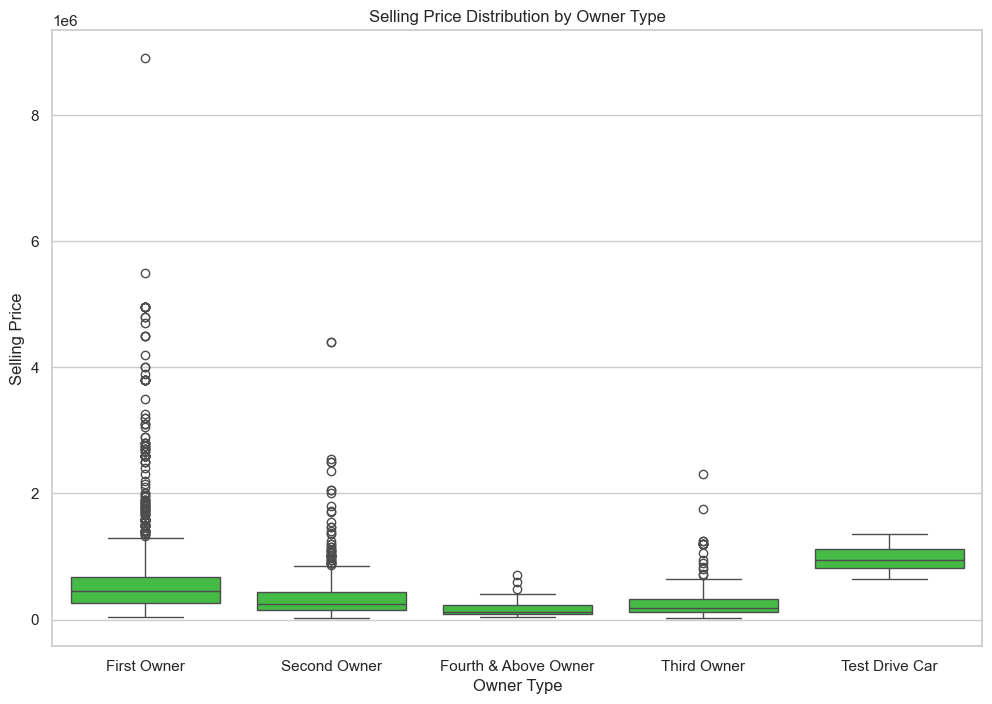

In [12]:
sns.set(style="whitegrid")

#specifying the colour of boxplot

boxplot_color = '#32CD32'#lime green

#specifying the size of the figure(box plot)

plt.figure(figsize=(12,8))
sns.boxplot(x='owner',y='selling_price',data=Cleaned_Data_frame,color=boxplot_color)

#specifying the title of the boxplot

plt.title('Selling Price Distribution by Owner Type')

#labelling both the axis

plt.xlabel("Owner Type")
plt.ylabel("Selling Price")
plt.show()

# Analysis of Selling Price by Ownership Type

## 1. Median Selling Price

- **First Owner**: Cars owned by the first owner have the highest median selling price.
- **Second Owner**: Followed by cars owned by the second owner.
- **Third Owner**: Next are cars owned by the third owner.
- **Test-Drive Car**: Cars used for test drives come next.
- **Fourth & Above Owners**: Cars owned by the fourth owner and beyond have the lowest median selling price.

## 2. Interquartile Range (IQR)

- **First Owner**: Vehicles owned by the first owner have the widest IQR, indicating a broader range in selling prices compared to other owner types.
- **Fourth & Above Owners**: Vehicles with IQRs for the fourth owner and above are the narrowest, suggesting more consistent pricing.

## 3. Outliers

- **First Owner**: The majority of vehicles are first-owner vehicles, which include a few exceptionally high or low selling prices.
- **Test-Drive Cars**: Vehicles used for test drives have the fewest outliers, indicating more uniform pricing.


## Overall Analysis

## 1. Fuel Type

The choice of fuel type has a significant impact on the selling price. **Petrol vehicles** typically command higher prices compared to other fuel types.

---

## 2. Year Type

Newer vehicles (higher year types) generally have higher selling prices. This reflects advancements in technology and shifts in market trends over time.

---

## 3. Seller Type

- **Individual Sellers**: Often charge higher prices, potentially due to factors such as direct negotiation and personalized service.
- **Dealer Types**: Prices might be lower compared to individual sellers due to standard pricing strategies and volume sales.

---

## 4. Transmission Type

**Automatic transmission vehicles** generally sell for more money compared to manual transmission vehicles. This can be attributed to the perceived convenience and technological benefits of automatic transmissions.

---

## 5. Owner Type

- **First Owner**: Vehicles owned by the first owner are typically valued higher.
- **Subsequent Owners**: Vehicles owned by subsequent owners are generally sold for less, reflecting depreciation and wear over time.

---



## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [14]:


# Defining  the valid criteria for filtering as given in the question
valid_owners_list = ['First Owner', 'Second Owner', 'Third Owner'] #owner to be first, second and third owner only
valid_fuel_list = ['Diesel', 'Petrol']#Fuel to be Diesel or Petrol only
valid_seller_list = ['Dealer', 'Individual']#Seller_type to be dealer or individual only

# Applying the filtering criteria as given in the question
filtered_car_data = Cleaned_Data_frame[
    (Cleaned_Data_frame['owner'].isin(valid_owners_list)) & 
    (Cleaned_Data_frame['fuel'].isin(valid_fuel_list)) &
    (Cleaned_Data_frame['seller_type'].isin(valid_seller_list))
]

# Printing  the length of the filtered DataFrame after removing outliers that is not qualified with the rules given in the question.
print(f'Number of records after filtering the cleaned data: {len(filtered_car_data)}')
#It is assumed that we have to filter these things from the cleaned data set after Q1




Number of records after filtering the cleaned data: 3657
